# Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Learning Outcome
Learning Objectives
Load, clean, process, analyze, and visualize data using Python
Explore the basic statistics of the dataset
Identify outliers or anomalies in the dataset
Draw conclusions and summarize the findings from the exploratory data analysis

## Key Questions Covered in the Analysis:

Loading Data:
How to load the dataset into a pandas DataFrame using Python?

Describing Data:
What are the summary statistics for key numerical columns such as Quantity, UnitPrice, and CustomerID?
How many unique products and customers are there in the dataset?

Cleaning Data:
Are there any missing values in the dataset, and how can they be handled?
Do we need to remove duplicates or outliers from the data?

Analyzing Data:
What are the top-selling products by quantity and revenue?
How do sales vary over different time periods (example, daily, weekly, monthly)?
Can we identify any trends or patterns in customer purchasing behavior?

Visualizing Data:
How can we create visualizations such as time series plots to explore the distribution and trends in the data?
Can we visualize the geographic distribution of sales using maps or bar charts?


## Dataset

The dataset contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx` can be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Task 1: Load the Data

In [11]:
import pandas as pd                    #data manipulation
import numpy as np
import seaborn as sns                  #Visuals
import matplotlib.pyplot as plt        #Visuals    
%matplotlib inline     
sns.set(color_codes=True)

In [12]:
df = pd.read_excel('Online Retail.xlsx')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [17]:
#Summary Stats for dataset

# Total number of rows
total_rows = len(df)

print("Total number of rows in the dataset:", total_rows)

# Numeric columns
summary_numeric = df.describe()
print(summary_numeric)

Total number of rows in the dataset: 541909
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID  
count  406829.000000  
mean    15287.690570  
min     12346.000000  
25%     13953.000000  
50%     15152.000000  
75%     16791.000000  
max     18287.000000  
std      1713.600303  


In [15]:
# Categorical columns
summary_categorical = df['Country'].value_counts()
print(summary_categorical)
#country wise number of sales

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


In [14]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [16]:
# Number of unique products
unique_products = df['StockCode'].nunique()

# Number of unique customers
unique_customers = df['CustomerID'].nunique()

print("Number of unique products:", unique_products)
print("Number of unique customers:", unique_customers)

Number of unique products: 4070
Number of unique customers: 4372


In [18]:
## Data Cleaning
# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values for each column
print("Missing values in the dataset:")
print(missing_values)



Missing values in the dataset:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [19]:
# Handling missing values by dropping rows with any missing values
df_cleaned = df.dropna()

In [23]:
total_rows_cleaned = len(df_cleaned)
print("Total number of rows after dropping rows with missing values:", total_rows_cleaned)


Total number of rows after dropping rows with missing values: 406829


In [39]:
# Check for and remove duplicates
duplicates_count = df_cleaned.duplicated().sum()
df_no_duplicates = df_cleaned.drop_duplicates()

total_rows_no_duplicates = len(df_no_duplicates)
print("Total number of rows after removing duplicates:", total_rows_no_duplicates)

df_online_retail = df_no_duplicates   #new cleaned file

Total number of rows after removing duplicates: 401604


In [45]:
# Top-selling products by quantity
top_selling_products_quantity = df_online_retail.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Top-selling products by quantity:")
print(top_selling_products_quantity)



Top-selling products by quantity:
StockCode
84077     53119
22197     48689
85099B    44963
84879     35215
85123A    34185
Name: Quantity, dtype: int64


In [44]:
# Top-selling products by revenue
df_online_retail.loc[:, 'Revenue'] = df_online_retail['Quantity'] * df_online_retail['UnitPrice']
print("Top-selling products by revenue:")
print(df_online_retail.groupby('StockCode')['Revenue'].sum().sort_values(ascending=False).head(5))


Top-selling products by revenue:
StockCode
22423     132567.70
85123A     93923.15
85099B     83056.52
47566      67628.43
POST       66710.24
Name: Revenue, dtype: float64


In [46]:
# Sales variation over different time periods
daily_sales = df_online_retail.set_index('InvoiceDate')['Quantity'].resample('D').sum()
weekly_sales = df_online_retail.set_index('InvoiceDate')['Quantity'].resample('W').sum()
monthly_sales = df_online_retail.set_index('InvoiceDate')['Quantity'].resample('M').sum()
print("\nDaily sales:")
print(daily_sales)
print("\nWeekly sales:")
print(weekly_sales)
print("\nMonthly sales:")
print(monthly_sales)




Daily sales:
InvoiceDate
2010-12-01    23931
2010-12-02    20790
2010-12-03    11507
2010-12-04        0
2010-12-05    16186
              ...  
2011-12-05    38224
2011-12-06    26641
2011-12-07    40903
2011-12-08    26837
2011-12-09     9522
Freq: D, Name: Quantity, Length: 374, dtype: int64

Weekly sales:
InvoiceDate
2010-12-05     72414
2010-12-12     99092
2010-12-19     93991
2010-12-26     29680
2011-01-02         0
2011-01-09     68535
2011-01-16     76271
2011-01-23     56449
2011-01-30     55930
2011-02-06     63911
2011-02-13     46158
2011-02-20     76389
2011-02-27     78969
2011-03-06     64584
2011-03-13     62777
2011-03-20     82032
2011-03-27     72396
2011-04-03     92901
2011-04-10     62533
2011-04-17     83001
2011-04-24     64515
2011-05-01     48281
2011-05-08     73099
2011-05-15     97930
2011-05-22    103087
2011-05-29     78839
2011-06-05     53897
2011-06-12     91018
2011-06-19     96383
2011-06-26     68311
2011-07-03     67055
2011-07-10     78066
2011

In [53]:
# Trends or patterns in customer purchasing behavior
#Key observations: CustomerID 12347 appears to be one of the most active customers, with a relatively high number of invoices, quantity purchased, and revenue generated. 
#There is variation in customer activity, with some customers making multiple purchases (e.g., CustomerID 12347) and others making only one purchase (e.g., CustomerID 12349).
customer_purchasing_behavior = df_online_retail.groupby('CustomerID').agg({'InvoiceNo': 'nunique', 'Quantity': 'sum', 'Revenue': 'sum'})
print("\nCustomer purchasing behavior:")
print(customer_purchasing_behavior)




Customer purchasing behavior:
            InvoiceNo  Quantity  Revenue
CustomerID                              
12346.0             2         0     0.00
12347.0             7      2458  4310.00
12348.0             4      2341  1797.24
12349.0             1       631  1757.55
12350.0             1       197   334.40
...               ...       ...      ...
18280.0             1        45   180.60
18281.0             1        54    80.82
18282.0             3        98   176.60
18283.0            16      1357  2045.53
18287.0             3      1586  1837.28

[4372 rows x 3 columns]



Top product bought by each of the top 5 customers:
      CustomerID              Description  Quantity
0        12415.0  MINI PAINT SET VINTAGE       2880
1        12415.0  MINI PAINT SET VINTAGE       2880
2        12415.0  MINI PAINT SET VINTAGE       2880
3        12415.0  MINI PAINT SET VINTAGE       2880
4        12415.0  MINI PAINT SET VINTAGE       2880
...          ...                      ...       ...
3101     18102.0  CREAM HEART CARD HOLDER      5946
3102     18102.0  CREAM HEART CARD HOLDER      5946
3103     18102.0  CREAM HEART CARD HOLDER      5946
3104     18102.0  CREAM HEART CARD HOLDER      5946
3105     18102.0  CREAM HEART CARD HOLDER      5946

[3106 rows x 3 columns]


In [51]:
# Find the top 5 customers
top_5_customers = customer_purchasing_behavior.sort_values(by='Revenue', ascending=False).head(5).index

print("\nTop 5 customers:")
print(top_5_customers)




Top 5 customers:
Index([14646.0, 18102.0, 17450.0, 14911.0, 12415.0], dtype='float64', name='CustomerID')

Top 5 customers:
Index([14646.0, 18102.0, 17450.0, 14911.0, 12415.0], dtype='float64', name='CustomerID')


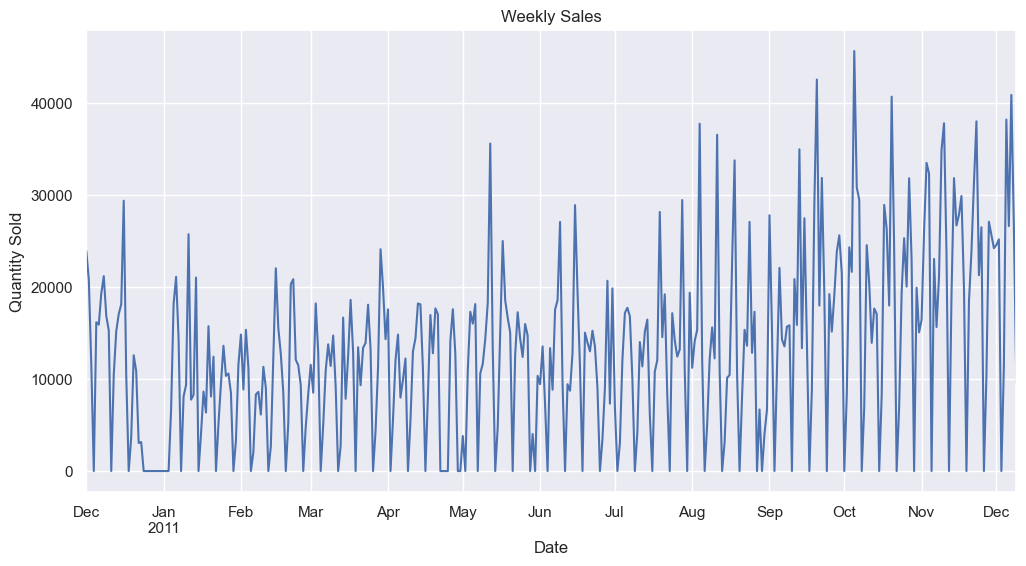

In [64]:
# Data Visualization

# Time Series Plot
plt.figure(figsize=(12, 6))
df_online_retail.set_index('InvoiceDate')['Quantity'].resample('D').sum().plot()
plt.title('Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

#Sales spikes in May, August, October to November, and December signify periods of heightened consumer activity influenced by seasonal trends, promotions, and holiday shopping.

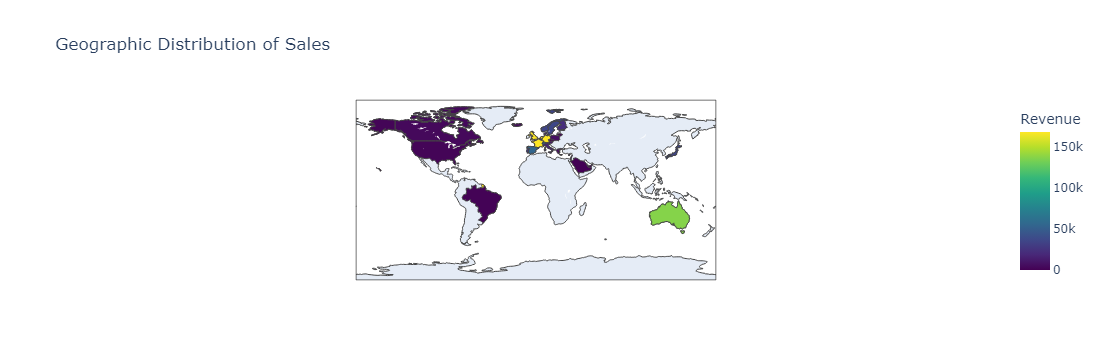

In [70]:

import plotly.express as px

# Group by Country and sum the Revenue
country_sales = df_online_retail.groupby('Country')['Revenue'].sum().reset_index()

# Plotting Geographic Distribution Map with custom color scale
fig = px.choropleth(country_sales, locations='Country', locationmode='country names', color='Revenue',
                    title='Geographic Distribution of Sales',
                    color_continuous_scale='Viridis',  # Customizing color scale
                    range_color=(0, df_online_retail['Revenue'].max()))  # Adjusting color scale range
fig.show()

#The geographic distribution map illustrates the sales performance across different countries based on revenue generated. 
#Each country is represented by a color gradient, with darker shades indicating higher revenue.
#UK, Australia and Germany has makes majority of the retailers revenue.
